In [91]:
import pandas as pd
from matplotlib import pyplot as plt

import numpy as np
import sklearn.linear_model as skl
from sklearn.metrics import r2_score

In [13]:
indice = ["Year" , "Median", "Min" , "Max" ,5,6,7,8,9,10,11,12]
totale = pd.read_fwf("HadCRUT_Totale_Annuale.txt" , header = None , names = indice)
totale = totale.drop([5,6,7,8,9,10,11,12] , axis = 1)
totale.describe()

,Year,Median,Min,Max
count,172.000000,172.000000,172.000000,172.000000
mean,1935.500000,-0.076529,-0.121855,-0.039488
std,49.796252,0.317301,0.327117,0.314831
min,1850.000000,-0.544000,-0.597000,-0.498000
25%,1892.750000,-0.294500,-0.355750,-0.252750
50%,1935.500000,-0.148000,-0.194000,-0.124500
75%,1978.250000,0.047250,0.026500,0.075250
max,2021.000000,0.797000,0.762000,0.835000


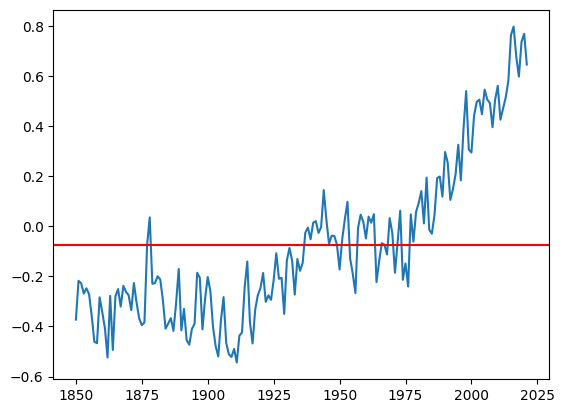

In [14]:
plt.plot(totale['Year'] , totale['Median'])
plt.axhline(y=totale['Median'].mean() , color = 'r')
#Sarebbe da fare bene sto grafico

In [65]:
def regressione(data) :
    X = np.zeros((len(data['Median']) , 2))
    X[:,0] = 1
    X[:,1] = data['Year']
    clf = skl.LinearRegression().fit(X , data['Median'])
    fity = clf.predict(X)
    devstd = r2_score(data['Median'] , fity)

    result = [fity , devstd]
    return result



In [87]:
filtro_post = totale[totale['Year'] < 1975].index
filtro_pre = totale[totale['Year'] > 1975].index

post_1975 = totale.drop(filtro_post)
pre_1975 = totale.drop(filtro_pre)

fit_tot = regressione(totale)
fit_post = regressione(post_1975)
fit_pre = regressione(pre_1975)


0.39540668460101003 0.8787564229487017


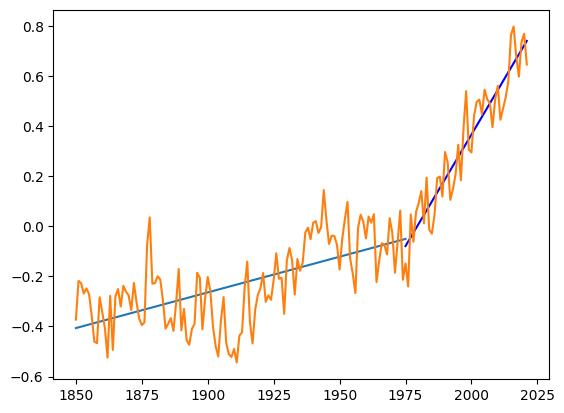

In [89]:
plt.plot(post_1975['Year'] , fit_post[0], c = 'b')
plt.plot(pre_1975['Year'] , fit_pre[0])
plt.plot(totale['Year'] , totale['Median'])

print(fit_pre[1] , fit_post[1])

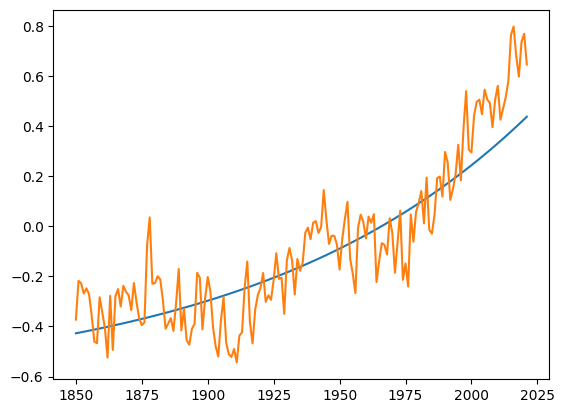

In [110]:
p = np.polyfit(totale['Year'] , np.log(totale['Median'] - totale['Median'].min() + 0.1) , 1)
a = np.exp(p[1])
b = p[0]
x_fitted = np.linspace(np.min(totale['Year']), np.max(totale['Year']), 100)
y_fitted = a * np.exp(b * x_fitted)

plt.plot(x_fitted , y_fitted + totale['Median'].min() - 0.1)
plt.plot(totale['Year'] , totale['Median'])